# Actividad 1 Natural Language Processing 
Integrantes del equipo:
- Diego Arturo Padilla Domínguez - A01552594
- Keyuan Zhao - A01366831
- Carolina Herrera Martínez - A01411547
- Cutberto Arizabalo Nava - A01411431
- Jose Pablo Cobos Austria - A01274631

In [1]:
import numpy as np

#Gensim
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
import os
# glove_file = datapath('/embeddings/glove.6B.100d.txt')
# directorio del archivo
glove_file = r"embeddings/glove.6B.100d.txt"
assert os.path.isfile(glove_file)

word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")

glove2word2vec(glove_file, word2vec_glove_file)


C:\Users\Keyuan\AppData\Local\Temp\ipykernel_19764\2676296476.py:9: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [3]:
word2vec = {}
embedding = []
idx2word = []
with open(glove_file) as f:
    for i, line in enumerate(f):
        value = line.split(" ")
        word = value[0]
        vec = np.asarray(value[1:], dtype = 'float32')
        word2vec[word] = vec
        embedding.append(vec)
        idx2word.append(word)

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [5]:
model.most_similar('dog')

[('cat', 0.8798074126243591),
 ('dogs', 0.8344309329986572),
 ('pet', 0.7449564337730408),
 ('puppy', 0.723637580871582),
 ('horse', 0.7109653949737549),
 ('animal', 0.6817063093185425),
 ('pig', 0.655417263507843),
 ('boy', 0.6545308232307434),
 ('cats', 0.6471932530403137),
 ('rabbit', 0.6468630433082581)]

In [6]:
model.most_similar('hello')

[('goodbye', 0.7905023694038391),
 ('hey', 0.7171452641487122),
 ('!', 0.6594691872596741),
 ('yeah', 0.6267021894454956),
 ('dear', 0.6220601201057434),
 ('mister', 0.6092501878738403),
 ('wow', 0.6079445481300354),
 ('muddah', 0.6048929691314697),
 ('mama', 0.6034210920333862),
 ('thank', 0.5993260145187378)]

In [19]:
def distance(word1, word2):
    return np.dot(model[word1], model[word2])/(np.linalg.norm(model[word1])* np.linalg.norm(model[word2]))

In [20]:
distance('hello', 'hey')

0.71714526

In [17]:
embedding = np.array(embedding)
V,D = embedding.shape
def analogy(x1, x2, y1):
    for w in (x1, x2, y1):
        if w not in word2vec:
            print("%s not in dictionary" % w)
            return
    x1vec = word2vec[x1]
    x2vec = word2vec[x2]
    y1vec = word2vec[y1]
    Vo = x2vec - x1vec + y1vec
    
    distance = pairwise_distances(Vo.reshape(1,D), embedding, metric = 'l2').reshape(V)
    ids = distance.argsort()[:4]
    words = [idx2word[idm] for idm in ids]
     
    best = [word for word in words if word not in (x1, x2, y1)]
    print('best match word', best)
    print('so,\n',x1, "-", x2, "=", y1, "-", best[0])

In [8]:
def display_pca_scatterplot(model, words):
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [18]:
analogy('man', 'king', 'women')

best match word  ['queen', 'monarch']
so,
 man - king = women - queen


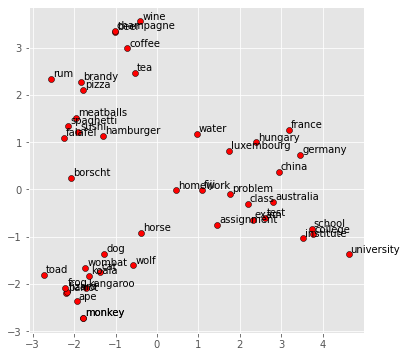

In [10]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])